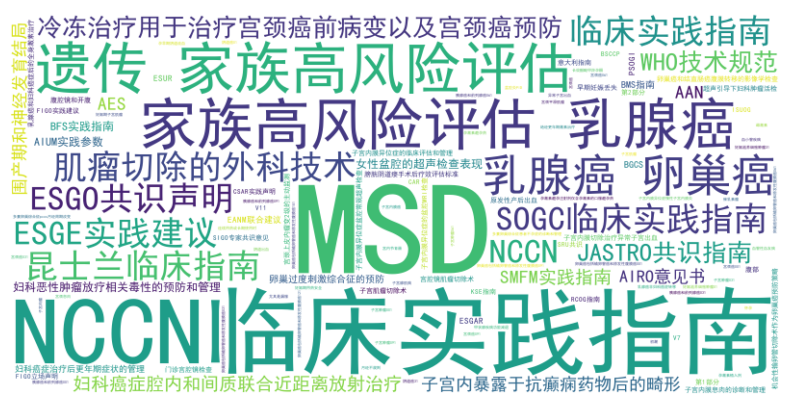

In [ ]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 指定目录路径
directory_path = 'D:\\chenyu\\Desktop\\知识库源数据\\pdf_to_json'

# 获取目录下的所有文件名
file_names = os.listdir(directory_path)

# 去掉文件名的后缀
file_names_without_ext = [os.path.splitext(filename)[0] for filename in file_names]

# 将文件名连接成一个长字符串
text = ' '.join(file_names_without_ext)

# 创建词云对象
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='simhei.ttf').generate(text)

# 使用matplotlib展示词云
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 关闭坐标轴
plt.show()


In [1]:
import os
import json

# 指定目录路径
directory_path = 'D:\\chenyu\\Desktop\\知识库源数据\\pdf_to_json'

# 获取目录下的所有文件名
file_names = os.listdir(directory_path)

# 过滤出所有的json文件
json_files = [filename for filename in file_names if filename.endswith('.json')]

# 读取每个JSON文件的内容
json_contents = []
for json_file in json_files:
    file_path = os.path.join(directory_path, json_file)
    with open(file_path, 'r', encoding='utf-8') as file:
        json_content = json.load(file)
        json_contents.append(json_content)


In [2]:
def process_text(data):
    import re
    cnt_list = []
    result = ""
    for page in data['pdf_info']:
        my_cnt = '# '
        count = 0
        for i in page['para_blocks']:
            # 检查 i 中是否存在 'lines' 键
            if 'lines' not in i:
                continue

            lines = i['lines']

            # 检查 lines 中是否存在至少一个元素
            if not lines:
                continue
            cnt = lines[0]['spans'][0]['content']
            # 使用正则表达式检查cnt是否有链接，有的话就删除链接
            cnt = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', cnt)
            if count == 1:
                my_cnt += '\n'
            my_cnt += cnt + '. '
            count += 1
        cnt_list.append(my_cnt)
        result += my_cnt + '\n\n'
    # print(result)
    return result
    # 将result结果输出为markdown文件

    # with open('result.md', 'w', encoding='utf-8') as f:
    #     f.write(result)


In [3]:
import re
import uuid
import json
import os
from tqdm import tqdm
# 打印或处理JSON内容（可选）
count = 0
for i, json_content in tqdm(enumerate(json_contents)):
    id = str(uuid.uuid4())
    id = id.replace('-', '')
    
    # print(f"File: {json_files[i]}")
    file_url = json_files[i]
    file_name = file_url.split('.json')[0]
    step1 = file_name.split('：')
    title = step1[1]
    
    source = step1[0]

    json_content = process_text(json_content)

    # 将这些数据装入字典中，到时候以jsonl格式存储
    data = {
        "id": id,
        "source": source,
        "title": title,
        "clean_text": json_content,
        "raw_text": "None",
        "url": "None",
        "overview":"None"
    }
    
    # 存储为jsonl格式 以追加的形式继续写入
    with open(f"meditron.jsonl", "a", encoding="utf-8") as f:
        f.write(json.dumps(data, ensure_ascii=False) + "\n")
    # count += 1
    # if count == 2:
        # break



70it [00:00, 573.78it/s]


In [ ]:
import os
from datasets import Dataset
from huggingface_hub import HfApi

# 使用你的Hugging Face访问令牌登录
api = HfApi(token="hf_***********************")

# 读取你的jsonl文件
file_path = 'd:\\code\\LLM\\agent\\gyne_diagnose\\src\\process_data\\meditron.jsonl'

# 创建一个Dataset对象
dataset = Dataset.from_json(file_path, split='train')

# 创建一个新的数据集仓库
repository_name = "RAG_dataset"

# 上传数据集到Hugging Face
dataset.push_to_hub(repository_name)


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]